In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the raw diabetes dataset from the URL
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
data = pd.read_csv(url, sep='\t') # Tab-delimited file

# Display column headers
print("Original column headers:")
print(list(data.columns))

Original column headers:
['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']


In [ ]:
#Rename headers for clarity
new_columns = {
    'AGE': 'Age', 'SEX': 'Sex', 'BMI': 'BMI', 'BP': 'Blood Pressure',
    'S1': 'Serum Cholesterol', 'S2': 'SerumLDL', 'S3': 'SerumHDL', 'S4': 'SerumTCH',
    'S5': 'SerumLTG', 'S6': 'SerumGlucose', 'Y': 'DiseaseProgression'
}
data.rename(columns=new_columns, inplace=True)

# Display top 5 rows
print("\nTop 5 rows of dataset")
print(data.head())


Top 5 rows of dataset
   Age  Sex   BMI  Blood Pressure  Serum Cholesterol  SerumLDL  SerumHDL  \
0   59    2  32.1           101.0                157      93.2      38.0   
1   48    1  21.6            87.0                183     103.2      70.0   
2   72    2  30.5            93.0                156      93.6      41.0   
3   24    1  25.3            84.0                198     131.4      40.0   
4   50    1  23.0           101.0                192     125.4      52.0   

   SerumTCH  SerumLTG  SerumGlucose  DiseaseProgression  
0       4.0    4.8598            87                 151  
1       3.0    3.8918            69                  75  
2       4.0    4.6728            85                 141  
3       5.0    4.8903            89                 206  
4       4.0    4.2905            80                 135  


In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['DiseaseProgression']) # Features
y = data['DiseaseProgression'] # Target

# Convert features to pandas DataFrame
pd_X = pd.DataFrame(X)
# Convert target to pandas Series for display
pd_Y = pd.Series(y)

# Display top 5 rows
print("\nTop 5 rows of Features")
print(pd_X.head(5))
print("\nTop 5 rows of Target")
print(pd_Y.head(5))


Top 5 rows of Features
   Age  Sex   BMI  Blood Pressure  Serum Cholesterol  SerumLDL  SerumHDL  \
0   59    2  32.1           101.0                157      93.2      38.0   
1   48    1  21.6            87.0                183     103.2      70.0   
2   72    2  30.5            93.0                156      93.6      41.0   
3   24    1  25.3            84.0                198     131.4      40.0   
4   50    1  23.0           101.0                192     125.4      52.0   

   SerumTCH  SerumLTG  SerumGlucose  
0       4.0    4.8598            87  
1       3.0    3.8918            69  
2       4.0    4.6728            85  
3       5.0    4.8903            89  
4       4.0    4.2905            80  

Top 5 rows of Target
0    151
1     75
2    141
3    206
4    135
Name: DiseaseProgression, dtype: int64


In [ ]:
#Check missing values
print("Missing values:", data.isnull().sum())
if data.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    data = data.dropna()
    X = data.drop(columns=['DiseaseProgression'])
    y = data['DiseaseProgression']

# Scale numerical features
numerical_cols = [col for col in X.columns if col != 'Sex']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\nFeatures after scaling (top 5 rows):")
display(X.head())

Missing values: Age                   0
Sex                   0
BMI                   0
Blood Pressure        0
Serum Cholesterol     0
SerumLDL              0
SerumHDL              0
SerumTCH              0
SerumLTG              0
SerumGlucose          0
DiseaseProgression    0
dtype: int64
No missing values found.

Features after scaling (top 5 rows):


,Age,Sex,BMI,Blood Pressure,Serum Cholesterol,SerumLDL,SerumHDL,SerumTCH,SerumLTG,SerumGlucose
0,0.800500,2,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,1,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,2,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,1,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,1,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568



Full Correlation Matrix:


,Age,Sex,BMI,Blood Pressure,Serum Cholesterol,SerumLDL,SerumHDL,SerumTCH,SerumLTG,SerumGlucose,Disease Progression
Age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
Sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
Blood Pressure,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
Serum Cholesterol,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
SerumLDL,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
SerumHDL,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
SerumTCH,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
SerumLTG,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
SerumGlucose,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


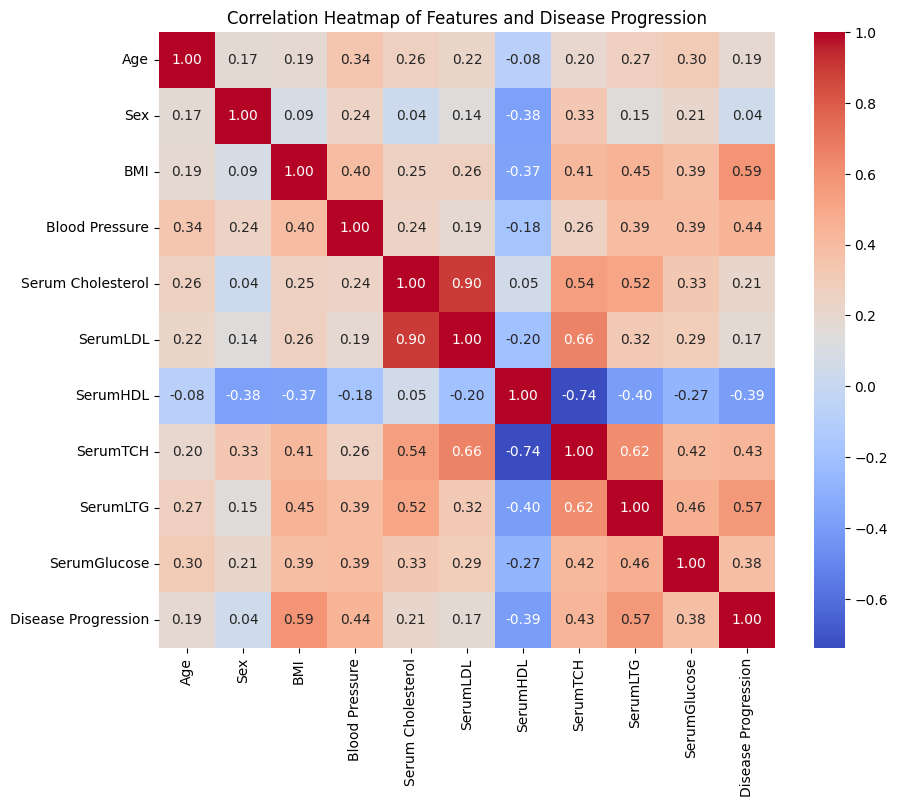

In [ ]:
# Combine features and target for correlation
data_temp = X.copy()
data_temp['Disease Progression'] = y
corr_matrix = data_temp.corr()

# Display the full correlation matrix
print("\nFull Correlation Matrix:")
display(corr_matrix)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Features and Disease Progression')
plt.show()

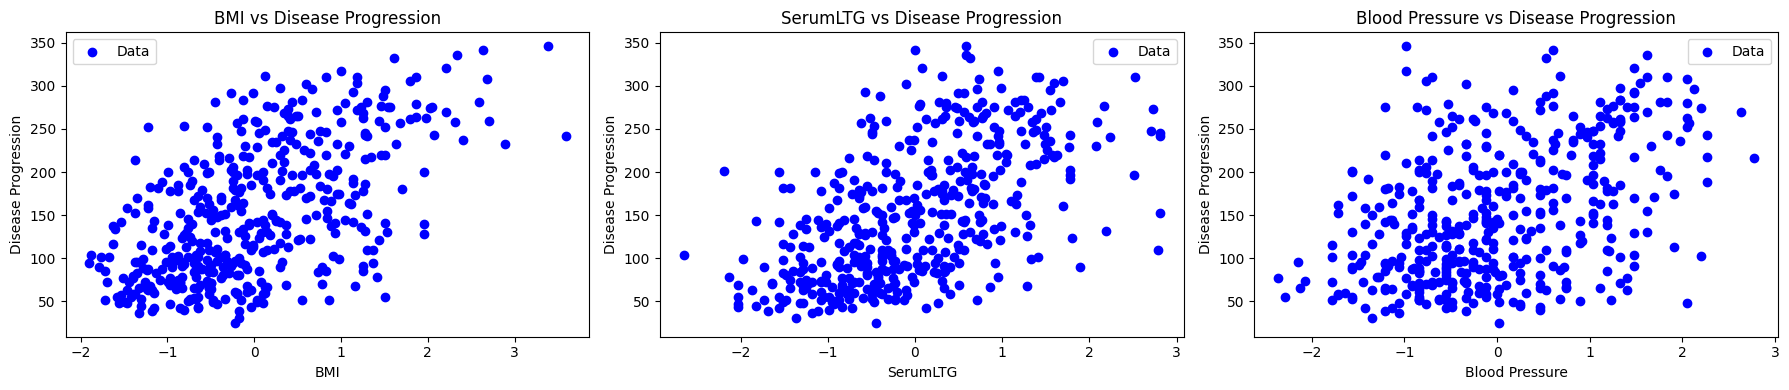

In [9]:
top_features = corr_matrix['Disease Progression'].abs().sort_values(ascending=False).index[1:4] # Exclude target itself
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, feature in enumerate(top_features):
    ax = axes[i]
    ax.scatter(X[feature], y, color='blue', label='Data')
    ax.set_xlabel(feature)
    ax.set_ylabel('Disease Progression')
    ax.set_title(f'{feature} vs Disease Progression')
    ax.legend()

plt.tight_layout() # Adjust layout
plt.show()

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 353, Testing samples: 89


In [11]:
# Train the Linear Regression model
model = LinearRegression() # Create the model
model.fit(X_train, y_train)

display("Model coefficients:", model.coef_) # Display model coefficients
print("Intercept:", model.intercept_) # Display intercept

'Model coefficients:'

array([  1.80291044, -23.06446772,  25.80070495,  16.53858529,
       -44.30640613,  24.64170961,   7.77309591,  13.09553713,
        35.01740872,   2.31502709])

Intercept: 185.21175737269553


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred) # Calculate Mean Squared Error
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # Calculate R² Score

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R² Score: 0.45


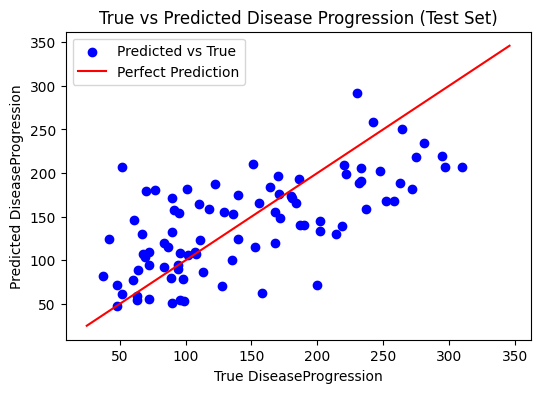

In [13]:
# Plot true vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', label='Perfect Prediction')
plt.xlabel('True DiseaseProgression')
plt.ylabel('Predicted DiseaseProgression')
plt.title('True vs Predicted Disease Progression (Test Set)')
plt.legend()
plt.show()

In [15]:
# Simple Linear Regression with Highest Correlated Feature
highest_corr = corr_matrix['Disease Progression'].abs().sort_values(ascending=False).index[1]
X_train_single = X_train[[highest_corr]]
X_test_single = X_test[[highest_corr]]

simple_model = LinearRegression()
simple_model.fit(X_train_single, y_train)

y_pred_single = simple_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
rmse_single = np.sqrt(mse_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"Simple Regression (using {highest_corr}):")
print(f"MSE: {mse_single:.2f}, R2: {r2_single:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_single:.2f}")
print(f"R² Score: {r2:.2f}")

Simple Regression (using BMI):
MSE: 4061.83, R2: 0.23
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.45
